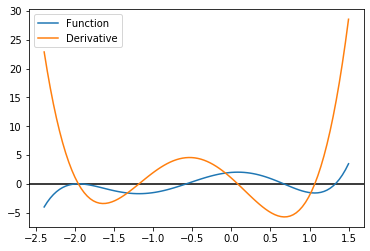

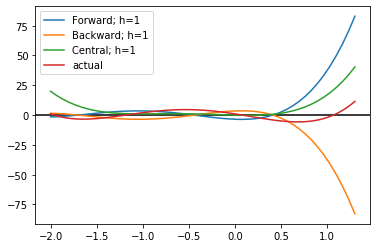

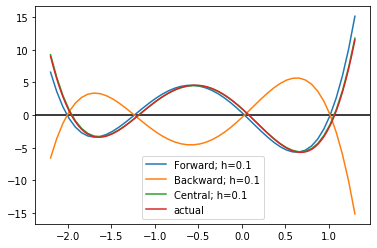

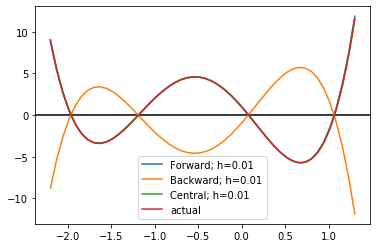

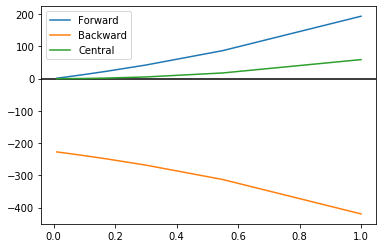

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

def forward_diff(f, h, x):
    m=f(x+h)
    n=f(x)
    forward=(m-n)/h
    
    return forward

def backward_diff(f, h, x):
    
    m=f(x+h)
    n=f(x)
    back=(n-m)/h
    
    return back


def central_diff(f, h, x):
    m=f(x+h)
    n=f(x-h)
    central=(m-n)/(2*h)
    return central

def error(f, f_prime, h, x):
    Y_correct = f_prime(x)
    f_error = np.array([])
    b_error = np.array([])
    c_error = np.array([])
    
    for h_i in h:
        f_error=np.append(f_error,forward_diff(f, h_i, x)-Y_correct)
        b_error=np.append(b_error,backward_diff(f, h_i, x)-Y_correct)
        c_error=np.append(c_error,central_diff(f, h_i, x)-Y_correct)

        
        
    
    return f_error, b_error, c_error


fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
data = p.linspace(domain=[-2.4, 1.5])
ax.plot(data[0], data[1], label='Function')

p_prime = p.deriv(1)
data2 = p_prime.linspace(domain=[-2.4, 1.5])
ax.plot(data2[0], data2[1], label='Derivative')

ax.legend()

##################################

h = 1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.0, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=1')

data2 = p_prime.linspace(domain=[-2.0, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

##################################

h = 0.1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.1')

data2 = p_prime.linspace(domain=[-2.2, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

##################################

h = 0.01
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.01')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.01')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.01')

data2 = p_prime.linspace(domain=[-2.2, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

##################################

fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

h = np.array([1., 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
err = error(p, p_prime, h, 2.0)

bx.plot(h, err[0], label='Forward')
bx.plot(h, err[1], label='Backward')
bx.plot(h, err[2], label='Central')
bx.legend()